# In Exercise 9, the distribution came "out of a hat". In this problem, we will again consider an experiment whose outcomes are not equally likely.

# We will determine a function $f(x)$ which can be used to determine the probability of certain events

# Let $T$ be the right triangle in the plane with vertices at the points (0,0), (1,0), and (0,1)

# The experiment consists of picking a point at random in the interior of $T$, and recording only the $x$-coordinate of the point. Thus, the sample space is the set [0,1], but the outcomes are not equally likely

# We can simulate this experiment b asking a computer to return two random real numbers in [0,1], and recording the first value when the sum of the two is less than one

# Write this program and run it for 10,000 trials

# Then make a bar graph of the results, breaking the interval [0,1] into 10 intervals

# Compare the bar graph to the function $f(x) = 2-2x$

# Now, show that there is some constant $c$ such that the height of T at the $x$-coordinate is $c$ times f(x) for every $x$ in [0,1]

# Finally, show that:

# $\int^{1}_{0}f(x)dx = 1$

# How can we use $f(x)$ to solve for the probability that the outcome is between 0.2 and 0.5?

___

# First, let's think about this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5

Z:\Users\sinclam2\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


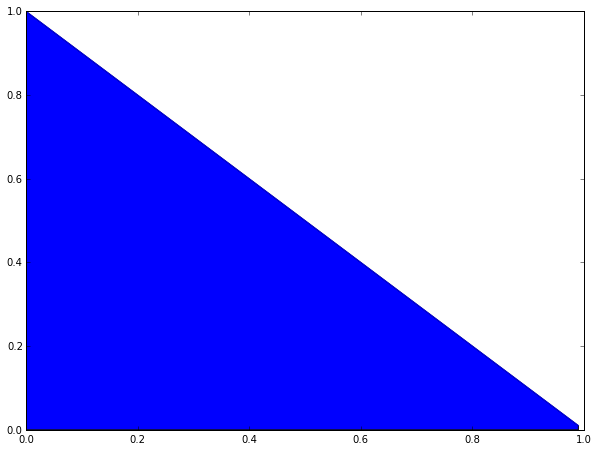

In [5]:
x = np.arange(0,1,0.01)
y = 1 - x

plt.plot(x,y)
plt.fill_between(x, y, 0)

# The $y$-value is equal to $1-x$ so if we sum $x$ and $y$ we get:

# $x+y = x + (1-x) = 1$

## That's why if we generate two random values whose sum is less than one, it lies inside the blue triangle

In [35]:
def sim(n):
    rand_array = np.random.random(size = (n, 2))
    values = rand_array[(np.sum(rand_array, axis = 1)<=1),0]
    return(values)

In [37]:
results = sim(10000)

In [45]:
counts, bins = np.histogram(results, bins = 11, range=(0,1.1), normed = True)

In [49]:
bins[1]

0.10000000000000001

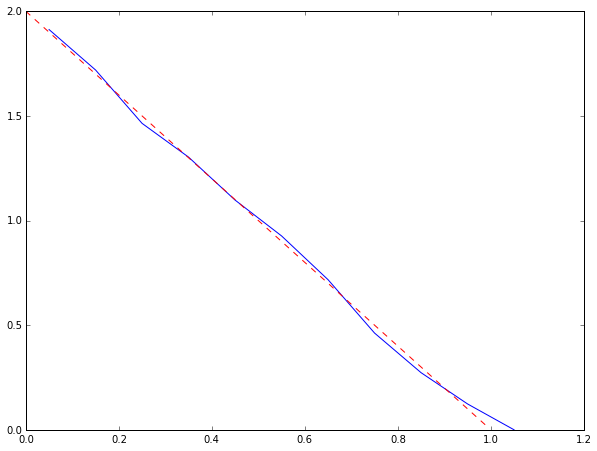

In [55]:
x_vals = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(x_vals,counts)
plt.plot(x, 2 - 2*x, ls = 'dashed', color = 'r')

# We can clearly see that the constant $c=0.5$

# To show that the integral is equal to 1, we can simply calculate the area of the triangle as:

# $\int^{1}_{0}f(x)dx = \frac{b\cdot h}{2} =  \frac{1\cdot2}{2} = 1$

# To solve for the probability that the height is between 0.2 and 0.5 we can calculate the area under the line, or we can integrate, or we can do a simulation

In [70]:
results = sim(100000)

In [71]:
a = results[(results<0.5)&(results>0.2)]

In [72]:
len(a)/float(len(results))

0.3884186725893911

# About 39% chance

## We can double check our answer

# $\int^{0.5}_{0.2}f(x)dx = 2x - x^{2}|^{0.5}_{0.2} = 2(0.5-0.2) - 0.5^{2} + 0.2^{2} = 0.39$

# Same answer!